# 3. Exploratory Data Analysis

In [1]:
import pandas as pd

ski_info = pd.read_csv('ski_info.csv')

In [2]:
# Avoid division by zero or NaN
ski_info['price_per_acre'] = ski_info['price'] / ski_info['skiable_acres']
ski_info['price_per_mile'] = ski_info['price'] / ski_info['slope_mi']

In [3]:
# Drop NaNs for display
valid_acre_df = ski_info.dropna(subset=['price_per_acre'])

print("Best value (lowest price per acre):")
print(valid_acre_df.nsmallest(20, 'price_per_acre')[['name', 'price', 'skiable_acres', 'price_per_acre']])

print("\nWorst value (highest price per acre):")
print(valid_acre_df.nlargest(20, 'price_per_acre')[['name', 'price', 'skiable_acres', 'price_per_acre']])

Best value (lowest price per acre):
                              name  price  skiable_acres  price_per_acre
124                  Dynamite Hill    0.0            8.0        0.000000
194                 Lee’s Ski Hill    0.0            2.0        0.000000
298                Powder Mountain  219.0         8464.0        0.025874
120             Discovery Ski Area   65.0         2200.0        0.029545
53                     Bogus Basin   79.0         2600.0        0.030385
0                 49 Degrees North   84.0         2325.0        0.036129
423      Whitefish Mountain Resort  110.0         3000.0        0.036667
202     Lost Trail Powder Mountain   68.0         1800.0        0.037778
147                   Great Divide   68.0         1600.0        0.042500
283                      Park City  328.0         7300.0        0.044932
402                Turner Mountain   45.0         1000.0        0.045000
13   Anthony Lakes Mountain Resort   50.0         1100.0        0.045455
258            

In [4]:
owner_summary = ski_info.groupby('owner')[['price', 'price_per_acre']].mean().reset_index()

# Rename columns for clarity
owner_summary.columns = ['owner', 'avg_ticket_price', 'avg_price_per_acre']

print(owner_summary.sort_values('avg_ticket_price'))

                                 owner  avg_ticket_price  avg_price_per_acre
18                   Wisconsin Resorts         69.800000            0.749833
5                          Independent         70.491090            0.853634
12                    Schmitz Brothers         76.666667            1.755556
3                            CMR Lands         80.500000            0.042127
15                  The Perfect Family         83.500000            0.835000
8            Mountain Capital Partners         84.444444            0.282128
13                       Snow Partners         99.990000            0.598743
16                 The Schaefer Family        102.000000            0.669737
7           Midwest Family Ski Resorts        112.000000            0.540497
9                       New York State        117.333333            0.454292
10               Pacific Group Resorts        127.000000            0.599096
6                         JMA Ventures        133.000000            0.095817

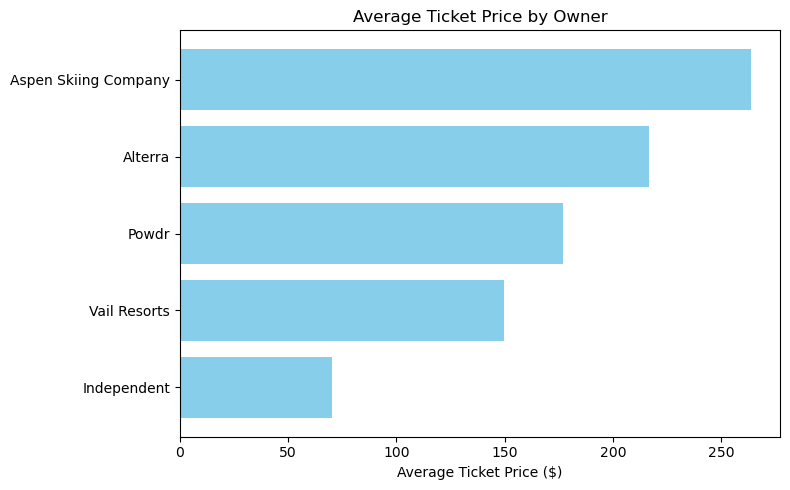

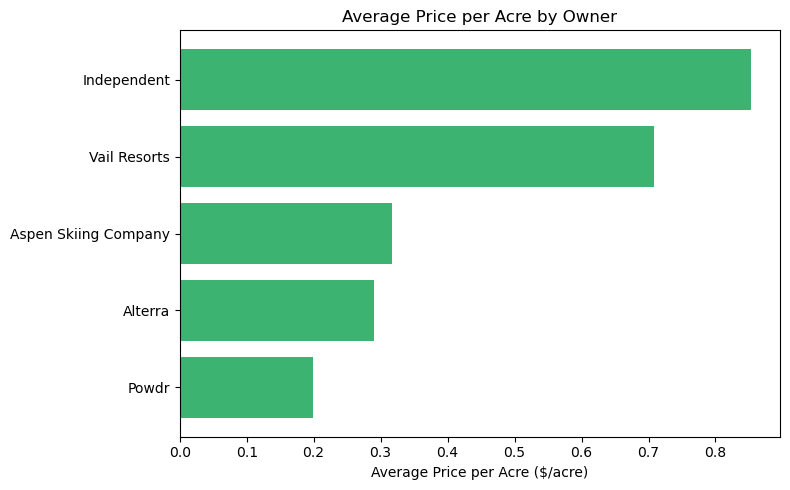

In [5]:
import matplotlib.pyplot as plt

# Filter for the specified owners
selected_owners = ['Independent', 'Powdr', 'Alterra', 'Vail Resorts', 'Aspen Skiing Company']
filtered_summary = owner_summary[owner_summary['owner'].isin(selected_owners)]

# Sort by average ticket price
filtered_summary_price = filtered_summary.sort_values('avg_ticket_price')

# Sort by average price per acre
filtered_summary_acre = filtered_summary.sort_values('avg_price_per_acre')

# --- Plot 1: Average Ticket Price ---
plt.figure(figsize=(8, 5))
plt.barh(filtered_summary_price['owner'], filtered_summary_price['avg_ticket_price'], color='skyblue')
plt.xlabel('Average Ticket Price ($)')
plt.title('Average Ticket Price by Owner')
plt.tight_layout()
plt.show()

# --- Plot 2: Average Price per Acre ---
plt.figure(figsize=(8, 5))
plt.barh(filtered_summary_acre['owner'], filtered_summary_acre['avg_price_per_acre'], color='mediumseagreen')
plt.xlabel('Average Price per Acre ($/acre)')
plt.title('Average Price per Acre by Owner')
plt.tight_layout()
plt.show()

In [6]:
owner_summary = ski_info.groupby('owner')[['price', 'price_per_mile']].mean().reset_index()

# Rename columns for clarity
owner_summary.columns = ['owner', 'avg_ticket_price', 'avg_price_per_mile']

print(owner_summary.sort_values('avg_ticket_price'))

                                 owner  avg_ticket_price  avg_price_per_mile
18                   Wisconsin Resorts         69.800000           22.500000
5                          Independent         70.491090           20.569621
12                    Schmitz Brothers         76.666667           43.333333
3                            CMR Lands         80.500000            3.406250
15                  The Perfect Family         83.500000           16.318182
8            Mountain Capital Partners         84.444444            6.943845
13                       Snow Partners         99.990000            6.666000
16                 The Schaefer Family        102.000000           12.020833
7           Midwest Family Ski Resorts        112.000000           13.154167
9                       New York State        117.333333            5.967593
10               Pacific Group Resorts        127.000000           10.453936
6                         JMA Ventures        133.000000            7.962500